In [1]:
import hwdetect
import cv2

**training a new model (cnn)**

Since multiple snapshots are stored during
training, the training can be stopped (CTRL+C if you
are running in a console) without losing useful
results.

This will overwrite the old contents of trained_model,
if there are any, so make sure to backup them somewhere.

In [4]:
# the data object is just the loaded pickle
# TODO explain here where to get the pickle. 1px? 100px?
data = hwdetect.data.load()

model_path = 'trained_example_models'
hwdetect.neural_network.model.create(model_path, image_size=150, image_channels=3, label_size=1)
hwdetect.neural_network.model.train(model_path, data)

# or:
# hwdetect.neural_network.model.train('folder', 'path_to_pickle')

model created
INFO:tensorflow:Restoring parameters from trained_example_models/model-0
training started


AttributeError: 'dict' object has no attribute 'x_train'

**loading an already trained model**

In [5]:
# load model that has already been trained
predictor = hwdetect.neural_network.Predictor(model_path, 2100)
# or: 
# predictor = hwdetect.neural_network.Predictor('folder')

# continue training:
hwdetect.neural_network.model.train(model_path, data)

ValueError: The passed save_path is not a valid checkpoint: trained_example_models/model-2100

**the pipeline; locating handwriting on unseen documents**

INFO:tensorflow:Restoring parameters from /home/proxima/Desktop/DIR/capstone/handwriting_detection/hwdetect/neural_network/trained_models/model-2100
pre-processing complete
0% of predictions complete
10% of predictions complete
20% of predictions complete
30% of predictions complete
40% of predictions complete
50% of predictions complete
60% of predictions complete
70% of predictions complete
80% of predictions complete
90% of predictions complete
100% of predictions complete
0% of heat map complete
10% of heat map complete
20% of heat map complete
30% of heat map complete
40% of heat map complete
50% of heat map complete
60% of heat map complete
70% of heat map complete
80% of heat map complete
90% of heat map complete
100% of heat map complete


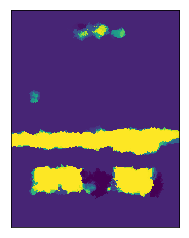

In [7]:
# all values have standard values and don't have to be provided
# (except the img on which you want to predict of course):

# if predictor not provided, will use pretrained
# model from our repository

img = cv2.imread('example_data/easy1.jpg')

heatmap = hwdetect.create_heat_map(img,
         preprocessors=[hwdetect.preprocessor.Threshold(), hwdetect.preprocessor.Bandpass()],
         sampler=hwdetect.sampler.RandomGrid(grid_frequency=100),
         predictor=hwdetect.neural_network.Predictor(),
         interpolator=hwdetect.interpolation.NearestNeighbour())

hwdetect.utils.show(heatmap)

**minimal**

In [1]:
# output = hwdetect.Mapper().input(img)
# TODO maybe make a shortcut function that does all the funky stuff or something